In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

In [2]:
import os 
import glob

In [3]:
from shapely.geometry import Polygon, LineString, Point
from rasterio.plot import show

# Pedestrian and bicycle roads 29.10.2022 data. Line shapes
downloaded from: <br> https://geohub.tartulv.ee/datasets/ad763de4f55643589e9e7bba712e778a_0/explore?location=58.367410%2C26.729643%2C13.46

In [4]:
klt = r".\original_shp\LI_kergliiklustee.shp"
data_klt = gpd.read_file(klt)
data_klt = data_klt.to_crs(epsg=3301)
print(data_klt.crs) # Check coordinate projection. All spatial shapes have to be in the same projection !

epsg:3301


# Tartu car roads 29.10.2022 data
downloaded from <br >https://geohub.tartulv.ee/datasets/c5946eb4ed264e68b17bc4145dbc9378_0/explore?location=58.364889%2C26.723034%2C13.02

In [5]:
st = r".\original_shp\LI_soidutee.shp"
data_st = gpd.read_file(st)
data_st = data_st.to_crs(epsg=3301)
print(data_st.crs) # Check coordinate projection. All spatial shapes have to be in the same projection !

epsg:3301


## Raster files (orthophotos)

In [6]:
#importing raster of Tartu. Map: 54761 in scale 1:10000
#raster image date 04.04.2019
raster_1 = rasterio.open(r".\raster\54761_rgb.tif")
raster_2 = rasterio.open(r".\raster\54752_rgb.tif")


## Creating polygon surrounding the selected areas, saving and ploting

In [7]:

#creating 3 study areas from the coordinates and saving them.
#first area
poly1 = Polygon([(658936.7309807226, 6474054.533392995), (659788.8617935145, 6474054.533392995), (659788.8617935145, 6473267.184454859), (658936.7309807226, 6473267.184454859)])
area_1 = gpd.GeoDataFrame(index=[0], crs='epsg:3301',columns = ["area_n"], geometry=[poly1])
area_1["area_n"] = "area_1"
#second area
poly2 = Polygon([(657905.827109984, 6472522.504347629), (658757.9579227759, 6472522.504347629), (658757.9579227759,6471735.1554094935), (657905.827109984,6471735.1554094935)])
area_2 = gpd.GeoDataFrame(index=[0], crs='epsg:3301', columns = ["area_n"], geometry=[poly2])
area_2["area_n"] = "area_2"
#third area
poly3 = Polygon([(662063.7022381894, 6474039.583729611), (662915.8330509813, 6474039.583729611), (662915.8330509813, 6473252.234791475), (662063.7022381894, 6473252.234791475)])
area_3 = gpd.GeoDataFrame(index=[0], crs='epsg:3301',columns = ["area_n"], geometry=[poly3])
area_3["area_n"] = "area_3"
# save the polygons into file
df_areas = pd.concat([area_1,area_2,area_3])
df_areas.to_file(r".\vector\Study_areas.shp",driver = "ESRI Shapefile")

<AxesSubplot:>

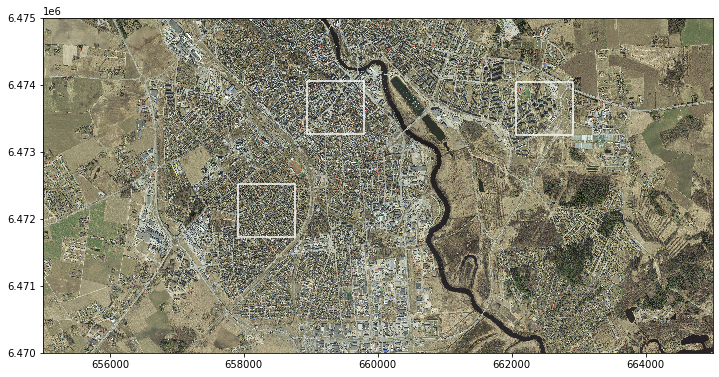

In [8]:
#plotting all to see the study areas
fig, ax = plt.subplots(1, figsize=(12, 10))

show((raster_1), cmap='terrain', interpolation='none', ax=ax)
show((raster_2), cmap='terrain', interpolation='none', ax=ax)
area_1.plot(ax=ax, edgecolor="white", linewidth=1.5,  facecolor="none")
area_2.plot(ax=ax, edgecolor="white", linewidth=1.5,  facecolor="none")
area_3.plot(ax=ax, edgecolor="white", linewidth=1.5, facecolor="none")

In [9]:
fig.savefig('study_areas.png', dpi=320) #saving the previous plot

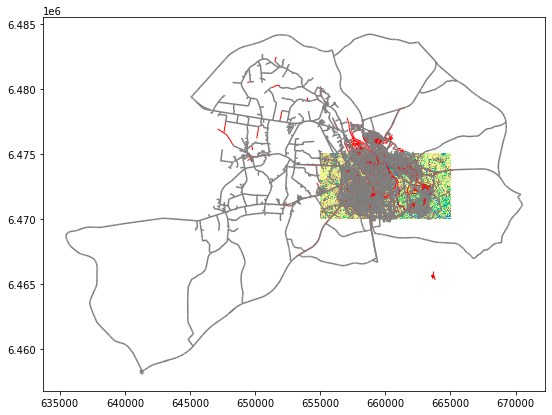

<Figure size 432x288 with 0 Axes>

In [10]:
#plotting all to see the study area
fig, ax = plt.subplots(1, figsize=(9, 7))

show((raster_1, 1), cmap='terrain', interpolation='none', ax=ax)
show((raster_2, 1), cmap='terrain', interpolation='none', ax=ax)
data_klt.plot(ax=ax, color="red", linewidth=1)
data_st.plot(ax=ax, color="grey", linewidth=1.5)

plt.show()
plt.tight_layout()

## Plotting study areas with roads

 This rasters are product of running the notebook "Process_tif_data.ipynb"

In [11]:

#area 1
raster_area_1 = rasterio.open(r".\raster\54752_clip_area_1_STK.tif")
#area 2
raster_area_2 = rasterio.open(r".\raster\54752_clip_area_2_STK.tif")
#area 3
raster_area_3 = rasterio.open(r".\raster\54761_clip_area_3_STK.tif")

area_1


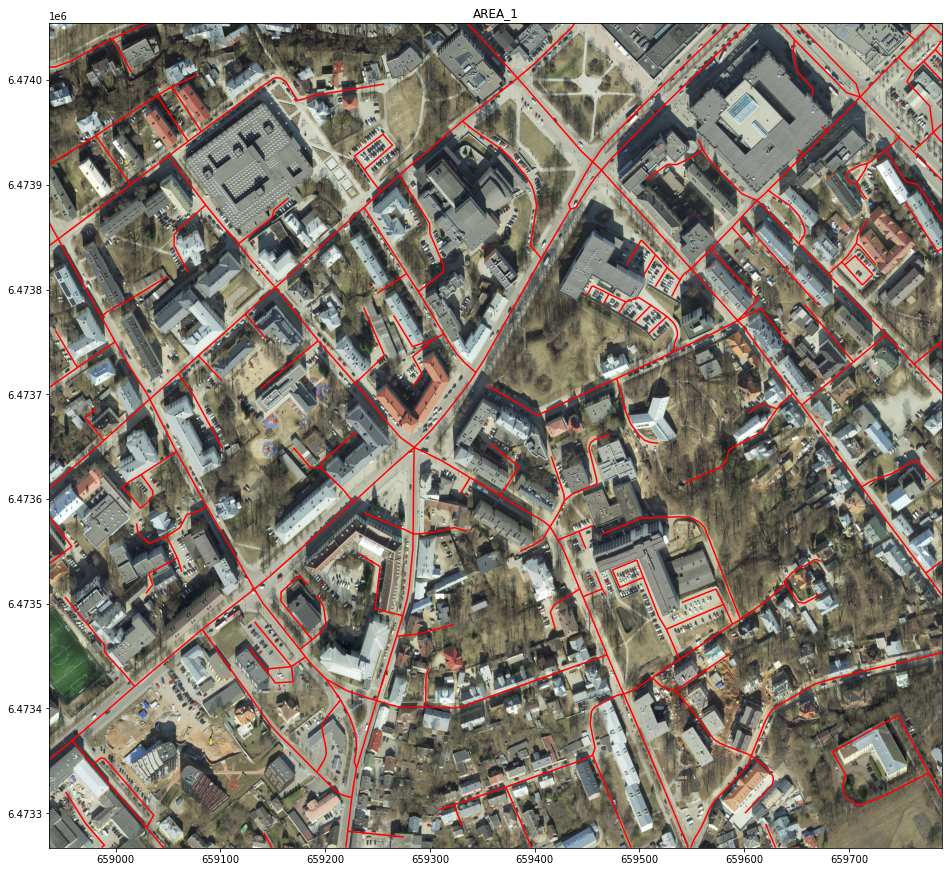

area_2


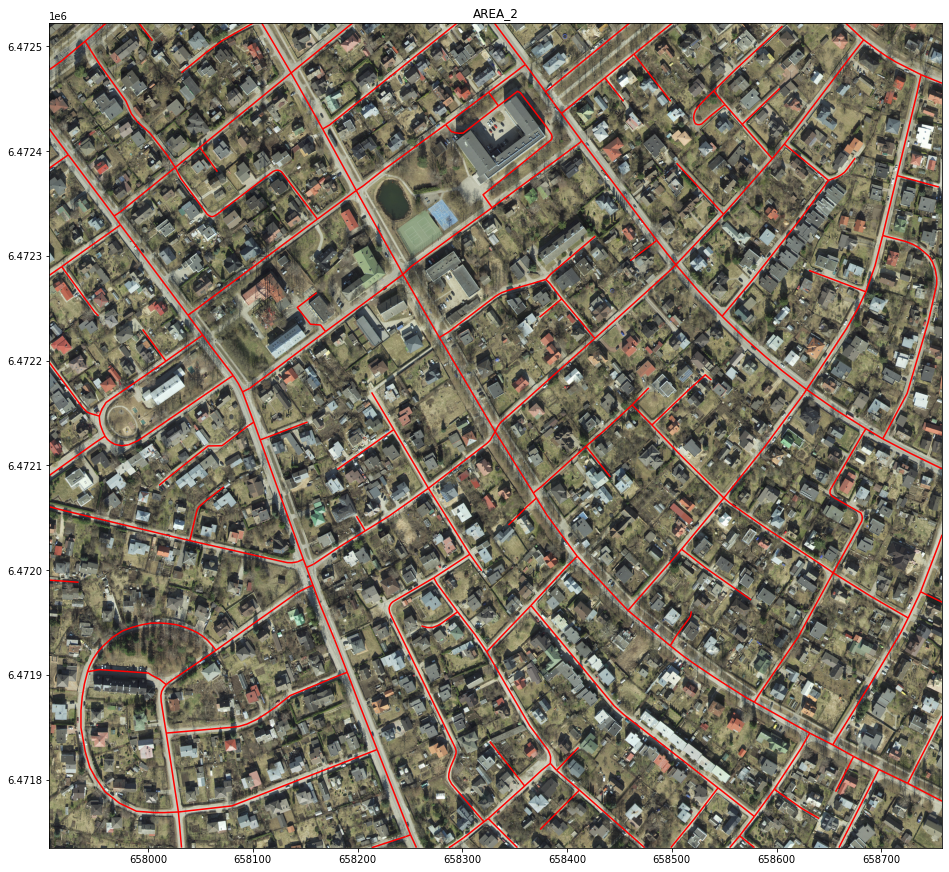

area_3


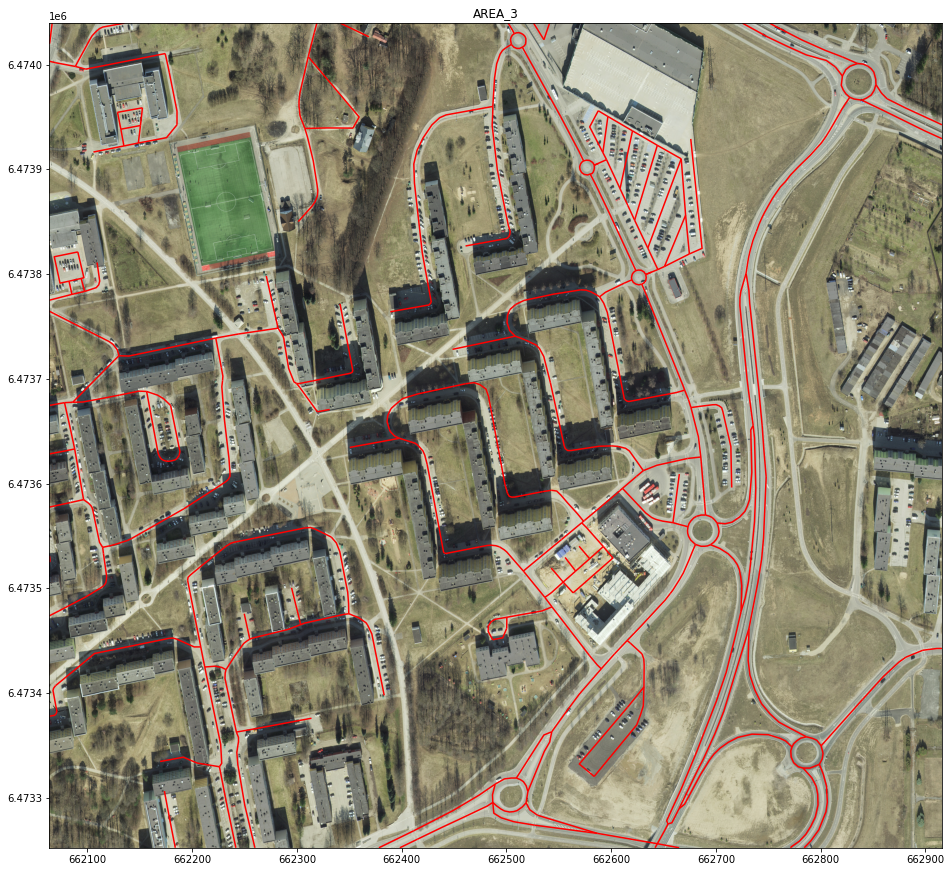

In [13]:
tif_folder = glob.glob(r".\raster\*.tif")

band_order = [3,2,1] # True colour for tif images

for area in df_areas["area_n"].unique():
    print(area)
    fig, ax = plt.subplots(1, figsize=(16, 16))
    
    area_selection = df_areas.loc[df_areas["area_n"] == area]
    st_area = gpd.clip(data_st, area_selection) # clip the car roads according to the area
    klt_area = gpd.clip(data_klt, area_selection) # pedestrian roads in the area
    
    #Save the line shapes clipped to study areas.
    
    st_area.to_file(r".\vector\st_"+area+".shp",driver = "ESRI Shapefile")
    
    # select raster area to plot
    raster_area =  [ras_area for ras_area in tif_folder if area in ras_area][0]
    with rasterio.open(raster_area) as src:
        
        show(src.read(band_order),transform=src.transform, ax = ax)
        st_area.plot(ax=ax, color="red", linewidth=1.5)
        plt.title(area.upper())
        plt.show()
    

